# 3. Linear Models for Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import features
import regressions

## 3.1 Linear Basis Function Models

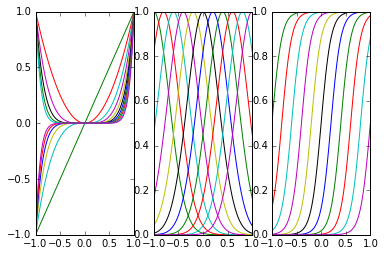

In [2]:
x = np.linspace(-1, 1, 100)
X_polynomial = features.Polynomial(11).transform(x[:, None])
X_gaussian = features.Gaussian(np.linspace(-1, 1, 11), 0.1).transform(x)
X_sigmoidal = features.Sigmoidal(np.linspace(-1, 1, 11), 10).transform(x)

for i, X in enumerate([X_polynomial, X_gaussian, X_sigmoidal]):
    plt.subplot(1, 3, i + 1)
    for j in range(12):
        plt.plot(x, X[:, j])

# 3.5 The Evidence Approximation

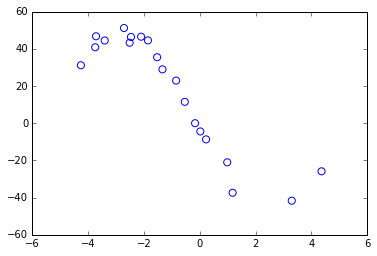

In [2]:
def create_toy_data(func, low=0, high=1, sample_size=10, sigma=1.):
    x = np.random.uniform(low, high, sample_size)
    t = func(x) + np.random.normal(scale=sigma, size=sample_size)
    return x, t

def func(x):
    return x * (x - 5) * (x + 5)

x, t = create_toy_data(func, -5, 5, 20, 5)

plt.scatter(x, t, s=50, facecolor="none", edgecolor="b", label="observation")

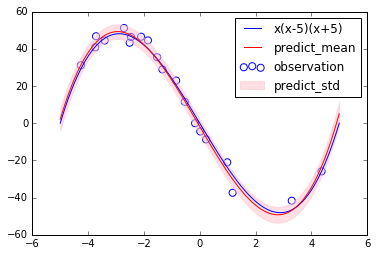

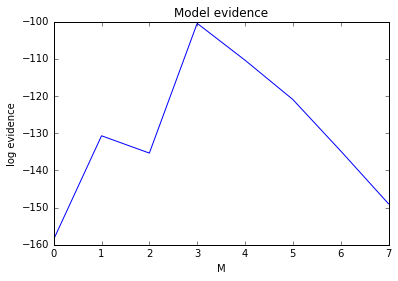

In [13]:
evidences = []
models = []
for i in range(8):
    feature = features.Polynomial(degree=i)
    X = feature.transform(x[:, None])
    regression = regressions.BayesianLinearRegression(alpha=100., beta=100.)
    regression.fit_evidence(X, t)
    evidences.append(regression.log_evidence(X, t))
    models.append(regression)
degree = np.argmax(evidences)
regression = models[degree]

x_test = np.linspace(-5, 5, 100)
X_test = features.Polynomial(degree=int(degree)).transform(x_test[:, None])
y, y_std = regression.predict_dist(X_test)

plt.scatter(x, t, s=50, facecolor="none", edgecolor="b", label="observation")
plt.plot(x_test, func(x_test), color="blue", label="x(x-5)(x+5)")
plt.plot(x_test, y, color="red", label="predict_mean")
plt.fill_between(x_test, y - y_std, y + y_std, color="pink", alpha=0.5, label="predict_std")
plt.legend()
plt.show()

plt.plot(evidences)
plt.title("Model evidence")
plt.xlabel("M")
plt.ylabel("log evidence")
plt.show()